# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [133]:
%%bash
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/bin/jupyter-nbextension", line 11, in <module>
    sys.exit(main())
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jupyter_core/application.py", line 255, in start
    self.subapp.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [134]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [198]:
train = pd.read_csv("train.csv")
#train

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [137]:
import datetime

del train ['dropoff_datetime']

#pd.to_datetime(train ['pickup_datetime'])
#train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d%H:%M:%S')
#train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], infer_datetime_format=True)
#print(train)
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [199]:
#data_train = train.iloc[:int(len(train)/10*7)]
#data_test = train.iloc[int(len(train)/10*7):]

from sklearn.model_selection import train_test_split



data_train, data_test = train_test_split(train, test_size=0.3, random_state=10)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [139]:
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671


Text(0.5,1,'distribution of trip duration')

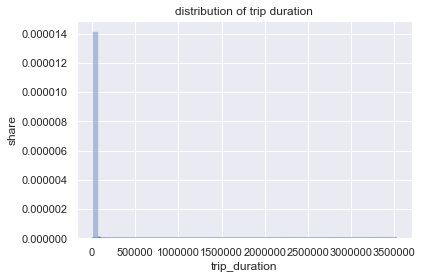

In [140]:

#sns.set(); np.random.seed(0)
x = data_train['trip_duration']
ax = sns.distplot(x)
ax.set(xlabel='trip_duration', ylabel='share')
ax.set_title('distribution of trip duration')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Хорошо видно, что она распределна очень неравномерно, большинство значений довольно малы, однакр самые большие достигают 3,5 миллионов

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

In [ ]:
Большинство значений маленькие, для которых хорошо подходит логарифм

Тут я случайно удалил задание с доказательством, и довольно поздно это обнаружен, поэтому простое cmd + z не помогло. 
Доказать надо  было, что RMSLE для a эквивалентна для MSE для a'

Для доказательства достаточно подставить модель а в RMSLE и увидеть, что она эквивалентна MSE. Продемонстрирую:
    
    $RMSLE(X, y, a) = \sqrt{\frac{1}{l}\cdot \sum_{i=1}^l log(y_i + 1) - log(a(x_i) + 1))^2} = \sqrt{\frac{1}{l}\cdot \sum_{i=1}^l log(y_i + 1) - log(e^{a'} - 1) + 1))^2} = \sqrt{\frac{1}{l}\cdot \sum_{i=1}^l (log(y_i + 1) - log(e^{a'(x_i)} - 1 + 1))^2} = \sqrt{\frac{1}{l}\cdot \sum_{i=1}^l (log\frac{(y_i + 1)}{e^{a'(x_i)} - 1 + 1)})^2} = \sqrt{\frac{1}{l}\cdot \sum_{i=1}^l (log\frac{(y_i + 1)}{e^{a'(x_i)})})^2} = 
\frac{1}{l} \sum_{i=1}^l log(y_i + 1) - {a'(x_i)} = 
\frac{1}{l} \sum_{i=1}^l y' - {a'(x_i)}$ 

Кстати, еще я удалил задание для графика ниже, но я думаю, надо было нарисовать распределение логарифма времени поездки:

Text(0.5,1,'distribution of log trip duration')

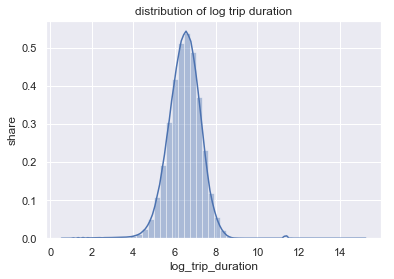

In [200]:
train['log_trip_duration'] = np.log1p(train['trip_duration'])
data_train['log_trip_duration'] = np.log1p(data_train['trip_duration'])
data_test['log_trip_duration'] = np.log1p(data_test['trip_duration'])
x = data_train['log_trip_duration']
ax = sns.distplot(x)
ax.set(xlabel='log_trip_duration', ylabel='share')
ax.set_title('distribution of log trip duration')

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [142]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

y_test = data_test['log_trip_duration']
y_train = data_train['log_trip_duration']


best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % rmse(y_test, best_constant))
print("Train RMSE with best constant = %.4f" % rmse(y_train, best_constant))

Test RMSE with best constant = 0.7943
Train RMSE with best constant = 0.7964


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

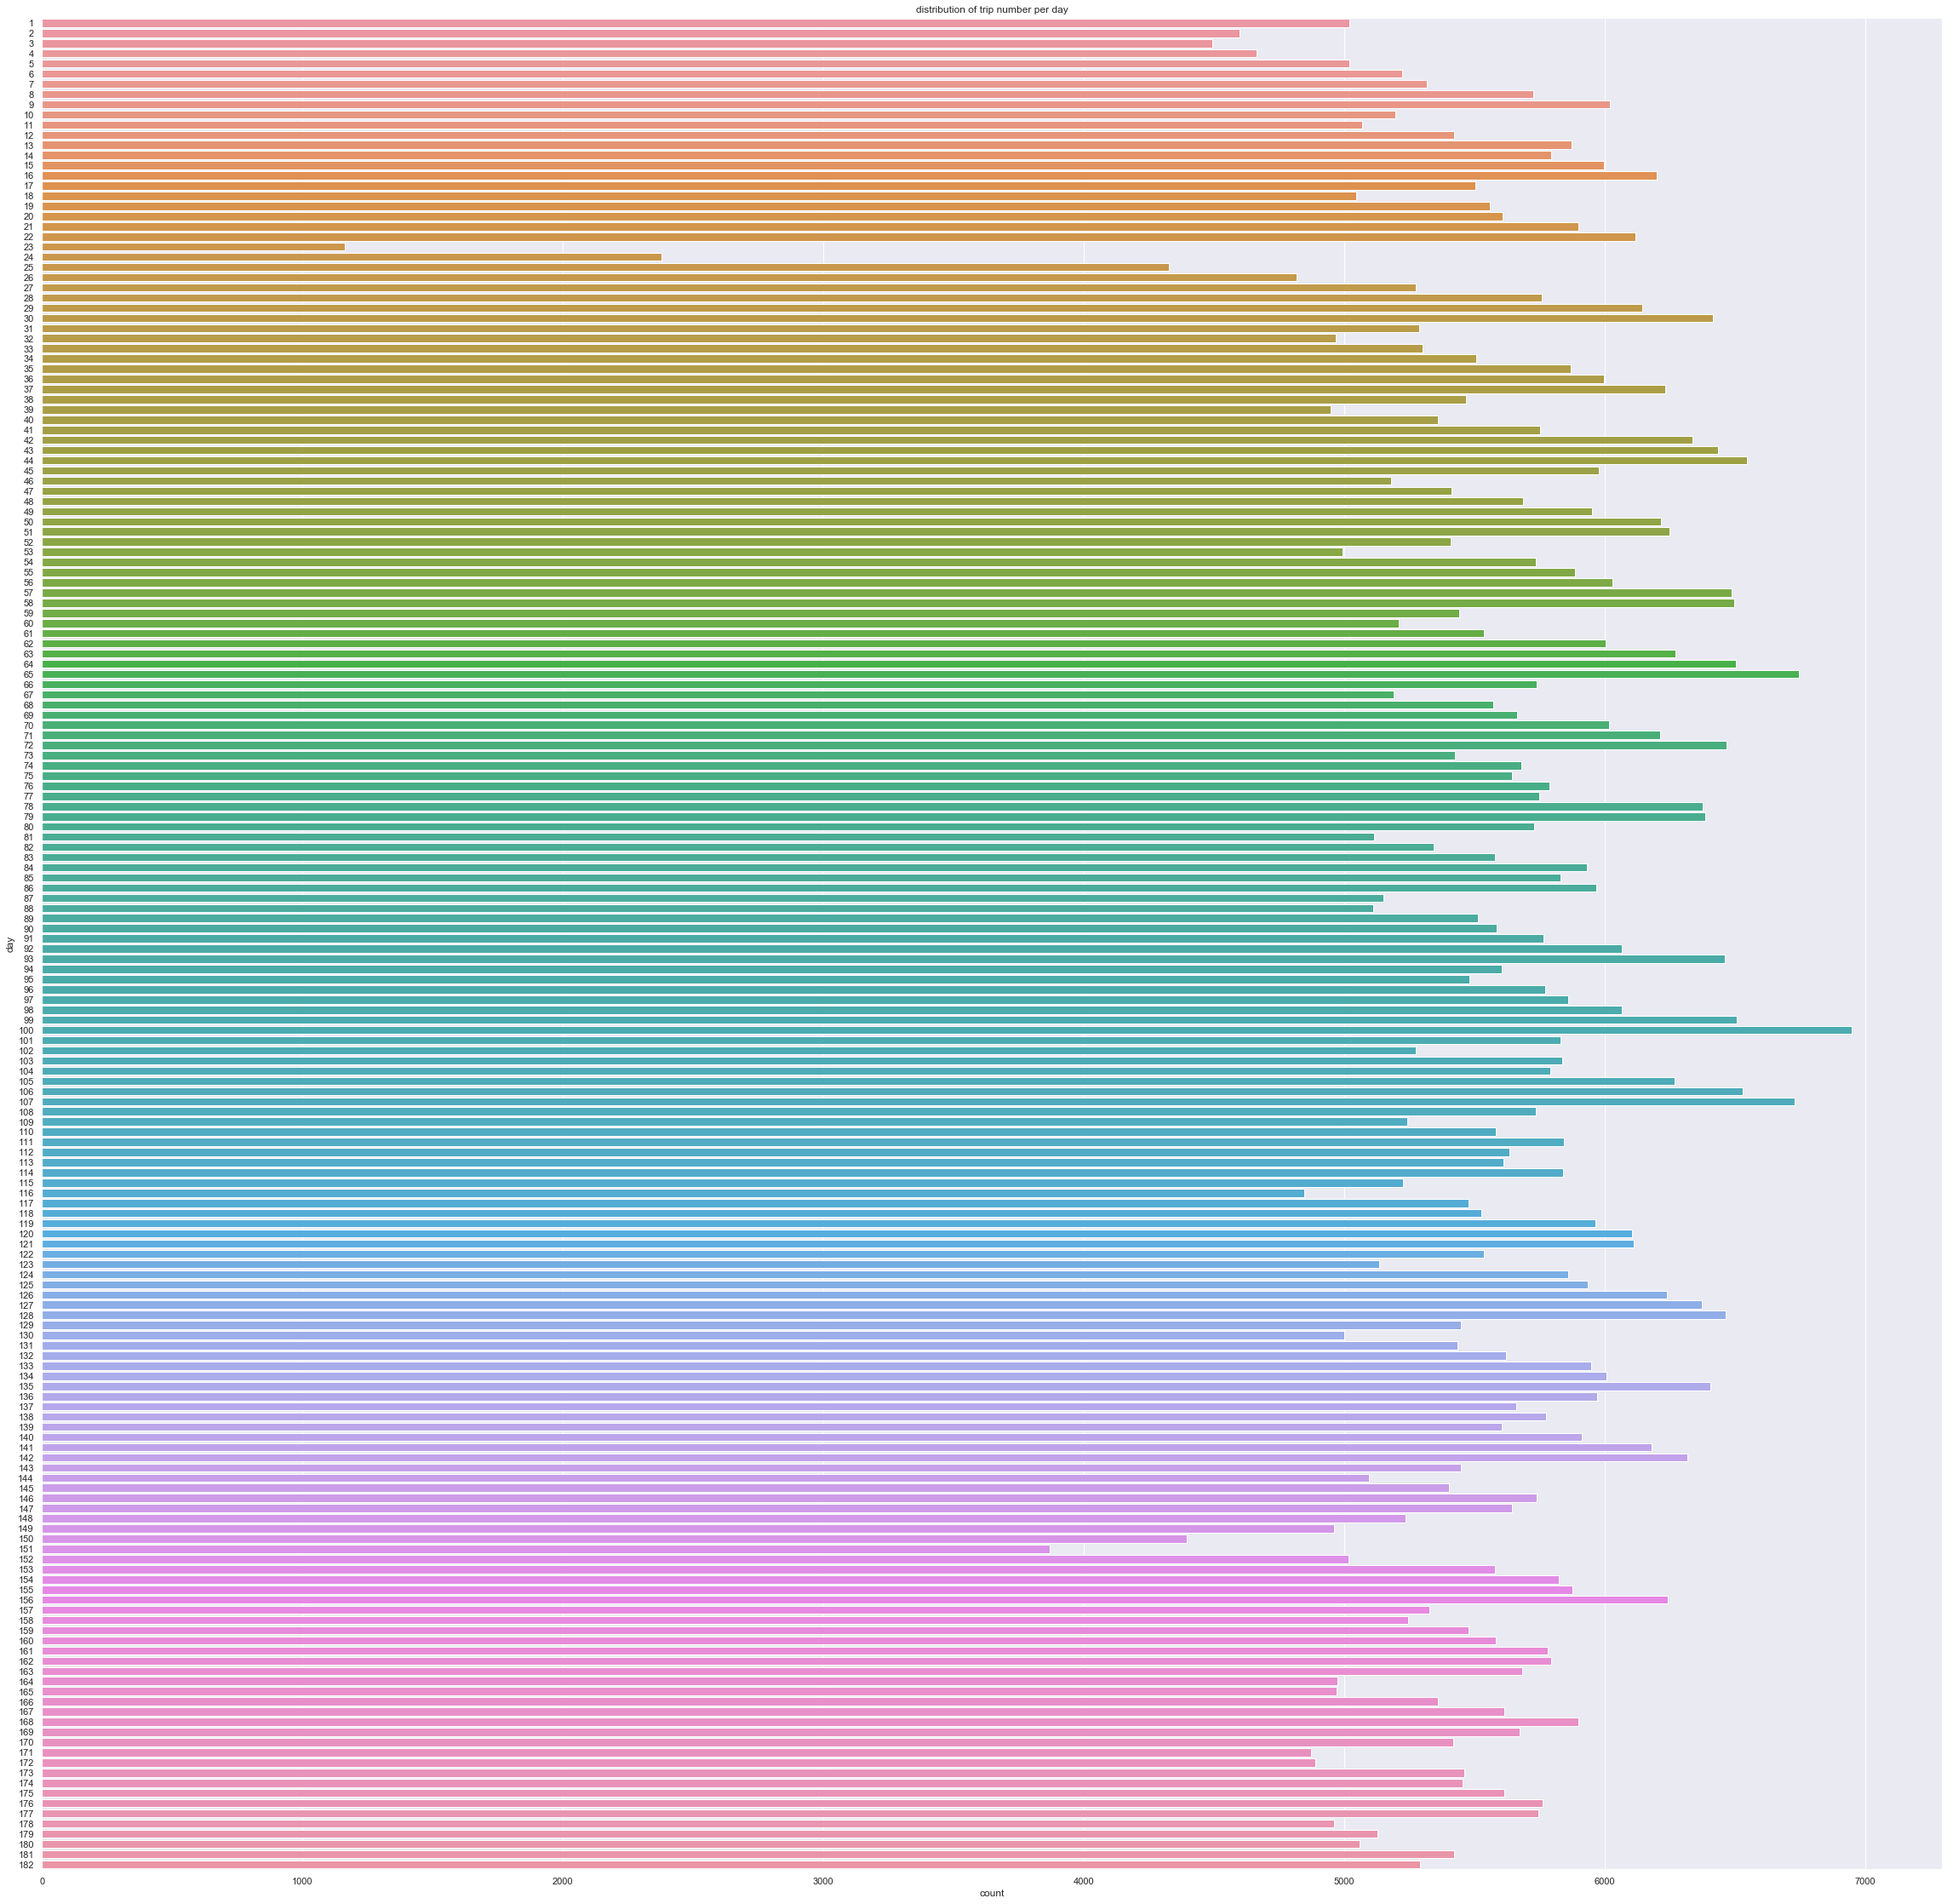

In [143]:
#ax = sns.countplot(x='passenger_count', data=train)

#for i in range (len(train['date'])):
 #   train.loc[i, 'date']  = train['pickup_datetime'][i].year * 10000 + train['pickup_datetime'][i].month * 100 + train['pickup_datetime'][i].day
    #print(train.dtypes)
    
import datetime
data_train['day'] = data_train.apply(lambda x: x['pickup_datetime'].dayofyear, axis=1)
plt.figure(figsize=(40,40))
ax = sns.countplot(y='day', data=data_train)
ax.set_title('distribution of trip number per day')
plt.show()
#data_train
#train['date'] = train['pickup_datetime']
#for i in range (len(train['date'])):
#    train['date'][i] = train['date'][i].day
#train

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

2 периода - это 22  и 23 января, а так же 151й день в году, то есть 30 мая, так как 2016 год - високосный

События - снегопад в январе и Мемориал дей в мае

In [145]:
data_train['num'] = data_train.apply(lambda x: 1, axis=1)
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day,num
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,7.134891,87,1
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,6.878326,78,1
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,7.642524,106,1
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,6.888572,84,1
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,6.177944,119,1
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655,8.204125,130,1
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396,7.242082,100,1
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332,7.195187,89,1
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585,6.373320,135,1
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671,6.510258,32,1


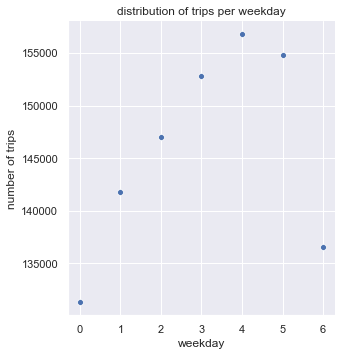

In [149]:
data_train['weekday'] = data_train.apply(lambda x: x['pickup_datetime'].dayofweek, axis=1)
temp1 = data_train[['weekday', 'num']].groupby(by='weekday').count().reset_index()
temp1
ax = sns.relplot(x='weekday', y='num', data=temp1)
plt.title('distribution of trips per weekday')
plt.xlabel('weekday')
plt.ylabel('number of trips')
plt.show()

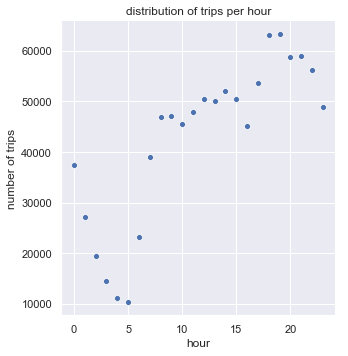

In [150]:
data_train['hour'] = data_train.apply(lambda x: x['pickup_datetime'].hour, axis=1)

temp1 = data_train[['hour', 'num']].groupby(by='hour').count().reset_index()
temp1
ax = sns.relplot(x='hour', y='num', data=temp1)
plt.title('distribution of trips per hour')
plt.xlabel('hour')
plt.ylabel('number of trips')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

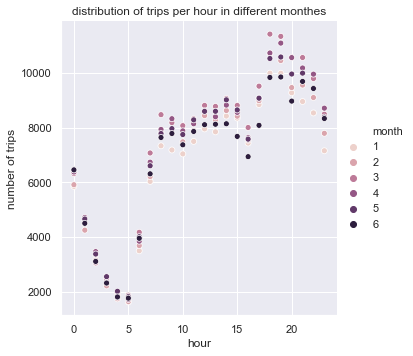

In [151]:
data_train['month'] = data_train.apply(lambda x: x['pickup_datetime'].month, axis=1)
#data_train
temp = data_train[['month', 'hour', 'num']]
temp = temp.groupby(['month',  'hour']).sum().reset_index()
ax = sns.relplot(x="hour", y="num", hue="month", data=temp, legend="full")
plt.title('distribution of trips per hour in different monthes')
plt.xlabel('hour')
plt.ylabel('number of trips')
plt.show()

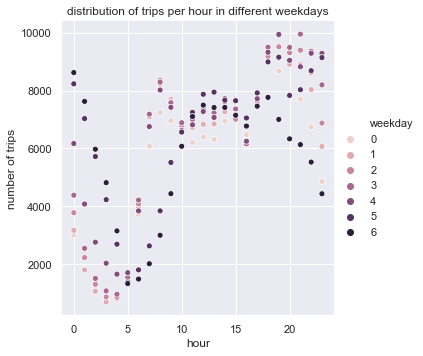

In [152]:
#data_train
temp = data_train[['weekday', 'hour', 'num']]
temp = temp.groupby(['weekday',  'hour']).sum().reset_index()
ax = sns.relplot(x="hour", y="num", hue="weekday", data=temp, legend="full")
plt.title('distribution of trips per hour in different weekdays')
plt.xlabel('hour')
plt.ylabel('number of trips')
plt.show()
#temp

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

Например, в воскресньюе и субботу поездки чаще совершаются в более позднее время (ночью) и реже по утрам
Так же можно заметить, что в зимнее время поездок больше, что  логично так как на улице холодно

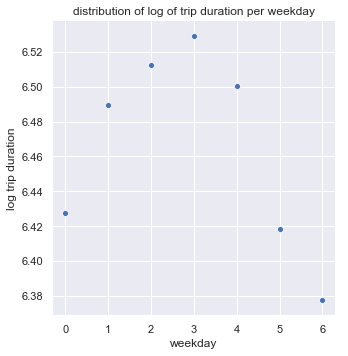

In [153]:
#data_train
temp = data_train[['weekday', 'log_trip_duration']]
temp = temp.groupby(['weekday']).mean().reset_index()
ax = sns.relplot(x="weekday", y="log_trip_duration", data=temp)
plt.title('distribution of log of trip duration per weekday')
plt.xlabel('weekday')
plt.ylabel('log trip duration')
plt.show()

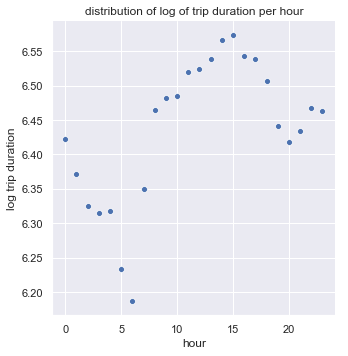

In [154]:
temp = data_train[['hour', 'log_trip_duration']]
temp = temp.groupby(['hour']).mean().reset_index()
sns.relplot(x="hour", y="log_trip_duration", data=temp)
plt.title('distribution of log of trip duration per hour')
plt.xlabel('hour')
plt.ylabel('log trip duration')
plt.show()

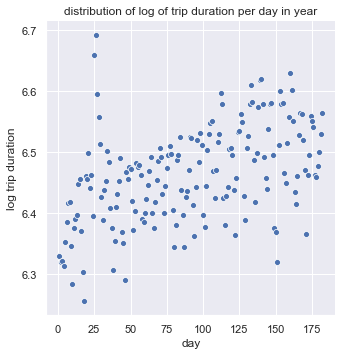

In [155]:
temp = data_train[['day', 'log_trip_duration']]
temp = temp.groupby(['day']).mean().reset_index()
sns.relplot(x="day", y="log_trip_duration", data=temp)
plt.title('distribution of log of trip duration per day in year')
plt.xlabel('day')
plt.ylabel('log trip duration')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

In [ ]:
Относительно похожи, что логично, тк таргет и  кол-во поездом взаимосвязаны
В аномальный январский период таргет очень возрос, в то время как в майский он наоборот просел. Логично - в день снегопада поездки занимают больше времени, а в Мемориал Дей наоборот.
log_trip_duration в среднем растет по мере возрастания дня в году, но в целом прямой зависимости нет

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [156]:
data_train['anomaly_january'] = data_train.apply(lambda x: (x['pickup_datetime'].dayofyear == 22 or x['pickup_datetime'].dayofyear == 23), axis=1)
data_train['anomaly_may'] = data_train.apply(lambda x: x['pickup_datetime'].dayofyear == 150 or x['pickup_datetime'].dayofyear == 151, axis=1)

data_test['weekday'] = data_test.apply(lambda x: x['pickup_datetime'].dayofweek, axis=1)
data_test['month'] = data_test.apply(lambda x: x['pickup_datetime'].month, axis=1)
data_test['hour'] = data_test.apply(lambda x: x['pickup_datetime'].hour, axis=1)
data_test['day'] = data_test.apply(lambda x: x['pickup_datetime'].dayofyear, axis=1)
data_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,weekday,month,hour,day,anomaly_january,anomaly_may
112342,id2631171,2,2016-01-23 00:09:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,6.493754,5,1,0,23,True,False
840803,id2892416,1,2016-02-10 19:24:14,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,7.514255,2,2,19,41,False,False
184538,id3095142,2,2016-05-12 06:39:26,1,-73.987595,40.719822,-74.010994,40.716148,N,490,6.196444,3,5,6,133,False,False
512001,id3803823,2,2016-01-21 08:31:03,1,-73.969055,40.763618,-73.974129,40.778679,N,767,6.643790,3,1,8,21,False,False
776055,id3155730,2,2016-01-02 13:12:33,2,-73.950165,40.775635,-73.944534,40.779636,N,199,5.298317,5,1,13,2,False,False
910791,id0874356,1,2016-06-15 12:01:16,2,-73.980469,40.760086,-73.979256,40.757919,N,1087,6.992096,2,6,12,167,False,False
1364150,id0458768,2,2016-04-24 21:40:52,2,-73.862770,40.768749,-73.980339,40.673988,N,1594,7.374629,6,4,21,115,False,False
927588,id0341390,2,2016-02-06 02:39:32,5,-74.000008,40.727139,-73.991692,40.731590,N,292,5.680173,5,2,2,37,False,False
1075265,id3060373,2,2016-04-30 22:18:43,1,-73.985252,40.748241,-73.958794,40.638069,N,2162,7.679251,5,4,22,121,False,False
245702,id3697455,2,2016-05-06 13:26:07,2,-73.980804,40.764107,-73.987968,40.754925,N,695,6.545350,4,5,13,127,False,False


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

Очевидно, все признаки, добавленные к текущему моменту и используемые в следующем задании - категориальные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [157]:
#temp = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day', 'trip_duration']]
#temp

y_test = data_test['log_trip_duration']
y_train = data_train['log_trip_duration']
X_test = data_test[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day']]
X_train = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day']]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

#model = pipeline.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("Test RMSE = %.4f" % rmse(y_test, y_pred))

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns


#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 0.6281
Train MSE = 0.6314


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [158]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [159]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [160]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

In [161]:
show_circles_on_map(train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{…

**Вопрос**: Какие две точки выделяются на карте?

Две точки - это два аэропорта Нью Йорк: ЛаГуардиа и ДжФК

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [162]:
from haversine import haversine, Unit
data_train['haversine'] = data_train.apply(lambda x: haversine((x['pickup_longitude'], x['pickup_latitude']), (x['dropoff_longitude'], x['dropoff_latitude'])) , axis=1)
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day,num,weekday,hour,month,anomaly_january,anomaly_may,haversine
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,7.134891,87,1,6,0,3,False,False,1.411815
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,6.878326,78,1,4,20,3,False,False,1.904250
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,7.642524,106,1,4,18,4,False,False,12.302947
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,6.888572,84,1,3,14,3,False,False,0.941963
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,6.177944,119,1,3,13,4,False,False,0.765366
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655,8.204125,130,1,0,14,5,False,False,22.233830
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396,7.242082,100,1,5,17,4,False,False,2.130204
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332,7.195187,89,1,1,10,3,False,False,1.147461
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585,6.373320,135,1,5,13,5,False,False,2.511751
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671,6.510258,32,1,0,22,2,False,False,1.134525


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [163]:
data_train['log_haversine'] = np.log1p(data_train['haversine'])
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day,num,weekday,hour,month,anomaly_january,anomaly_may,haversine,log_haversine
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,7.134891,87,1,6,0,3,False,False,1.411815,0.880380
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,6.878326,78,1,4,20,3,False,False,1.904250,1.066175
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,7.642524,106,1,4,18,4,False,False,12.302947,2.587986
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,6.888572,84,1,3,14,3,False,False,0.941963,0.663699
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,6.177944,119,1,3,13,4,False,False,0.765366,0.568358
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655,8.204125,130,1,0,14,5,False,False,22.233830,3.145609
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396,7.242082,100,1,5,17,4,False,False,2.130204,1.141098
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332,7.195187,89,1,1,10,3,False,False,1.147461,0.764286
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585,6.373320,135,1,5,13,5,False,False,2.511751,1.256115
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671,6.510258,32,1,0,22,2,False,False,1.134525,0.758244


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [164]:
temp = data_train[['log_trip_duration', 'haversine', 'log_haversine']]
temp.corr(method='pearson')

,log_trip_duration,haversine,log_haversine
log_trip_duration,1.000000,0.521611,0.675943
haversine,0.521611,1.000000,0.859915
log_haversine,0.675943,0.859915,1.000000


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

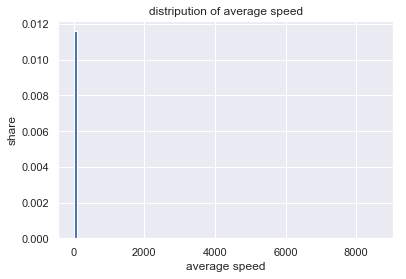

In [165]:
data_train['av_speed'] = data_train.apply(lambda x: x['haversine'] / x['trip_duration'] * 60 * 60, axis=1)
plt.hist(data_train['av_speed'], normed=True, bins=100)
plt.title('distribution of average speed')
plt.xlabel('average speed')
plt.ylabel('share')
plt.show()
#data_train
#print(max(data_train['av_speed']))
#print(len(data_train['av_speed']))

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

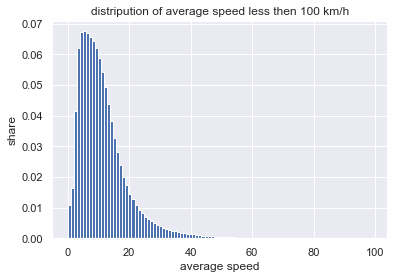

In [166]:
temp_sort = data_train['av_speed']
temp_sort = temp_sort.reset_index()
temp_sort = temp_sort.sort_values(by=['av_speed'])
temp_sort = temp_sort.reset_index()
n = 0
for i in range(len(temp_sort['av_speed'])-1,0,-1):
    if (temp_sort.loc[i, 'av_speed'] < 100):
        n = i
        break


temp_sort = temp_sort.drop(temp_sort.tail(len(temp_sort['av_speed']) - n).index) # drop last n rows

plt.hist(temp_sort['av_speed'], normed=True, bins=100)
plt.title('distripution of average speed less then 100 km/h')
plt.xlabel('average speed')
plt.ylabel('share')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

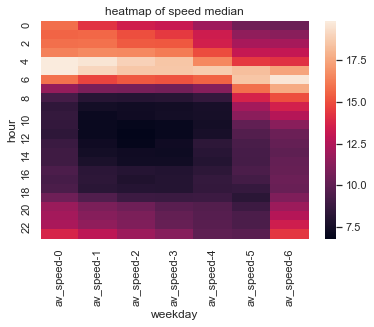

In [167]:
temp_new = data_train[['weekday', 'hour', 'av_speed']]
temp_new = temp_new.groupby(['hour',  'weekday']).median().unstack()
sns.heatmap(temp_new)
plt.title('heatmap of speed median')
plt.xlabel('weekday')
plt.ylabel('hour')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Скорость вычисляется с помощью таргета, поэтому ее нельзя использовать во время обучения

In [168]:
del data_train ['av_speed']

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [169]:
data_train['during_traffic'] = data_train.apply(lambda x: ((x['weekday'] < 6 and (x['hour'] > 7 and x['hour'] < 13)) or ((x['weekday'] > 0 and x['weekday'] < 4) and (x['hour'] > 12 and x['hour'] < 16)) or (x['weekday'] == 5 and x['hour'] == 19)), axis=1)
data_train['during_free_roads'] = data_train.apply(lambda x: ((x['weekday'] < 4 and (x['hour'] < 6 and x['hour'] > 3)) or (x['weekday'] == 4 and x['hour'] == 5) or (x['weekday'] == 5 and (x['hour'] > 4 and x['hour'] < 7)) or (x['weekday'] == 6 and (x['hour'] < 8 and x['hour'] > 4))), axis = 1)
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,num,weekday,hour,month,anomaly_january,anomaly_may,haversine,log_haversine,during_traffic,during_free_roads
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,...,1,6,0,3,False,False,1.411815,0.880380,False,False
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,...,1,4,20,3,False,False,1.904250,1.066175,False,False
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,...,1,4,18,4,False,False,12.302947,2.587986,False,False
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,...,1,3,14,3,False,False,0.941963,0.663699,True,False
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,...,1,3,13,4,False,False,0.765366,0.568358,True,False
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655,...,1,0,14,5,False,False,22.233830,3.145609,False,False
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396,...,1,5,17,4,False,False,2.130204,1.141098,False,False
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332,...,1,1,10,3,False,False,1.147461,0.764286,True,False
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585,...,1,5,13,5,False,False,2.511751,1.256115,False,False
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671,...,1,0,22,2,False,False,1.134525,0.758244,False,False


**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [170]:
data_train['LaGuardia_pickup'] = data_train.apply(lambda x: (x['pickup_longitude'] > -73.886067 and x['pickup_latitude'] > 40.767833 and x['pickup_longitude'] < -73.855189 and x['pickup_latitude'] < 40.785524), axis=1)
data_train['LaGuardia_dropoff'] = data_train.apply(lambda x: (x['dropoff_longitude'] > -73.886067 and x['dropoff_latitude'] > 40.767833 and x['dropoff_longitude'] < -73.855189 and x['dropoff_latitude'] < 40.785524), axis=1)
data_train['JFK_pickup'] = data_train.apply(lambda x: (x['pickup_longitude'] > -73.823325 and x['pickup_latitude'] > 40.622359 and x['pickup_longitude'] < -73.753042 and x['pickup_latitude'] < 40.658041), axis=1)
data_train['JFK_dropoff'] = data_train.apply(lambda x: (x['dropoff_longitude'] > -73.823325 and x['dropoff_latitude'] > 40.622359 and x['dropoff_longitude'] < -73.753042 and x['dropoff_latitude'] < 40.658041), axis=1)
data_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,anomaly_january,anomaly_may,haversine,log_haversine,during_traffic,during_free_roads,LaGuardia_pickup,LaGuardia_dropoff,JFK_pickup,JFK_dropoff
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,...,False,False,1.411815,0.880380,False,False,False,False,False,False
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,...,False,False,1.904250,1.066175,False,False,False,False,False,False
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,...,False,False,12.302947,2.587986,False,False,False,True,False,False
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,...,False,False,0.941963,0.663699,True,False,False,False,False,False
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,...,False,False,0.765366,0.568358,True,False,False,False,False,False
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655,...,False,False,22.233830,3.145609,False,False,False,False,True,False
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396,...,False,False,2.130204,1.141098,False,False,False,False,False,False
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332,...,False,False,1.147461,0.764286,True,False,False,False,False,False
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585,...,False,False,2.511751,1.256115,False,False,False,False,False,False
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671,...,False,False,1.134525,0.758244,False,False,False,False,False,False


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

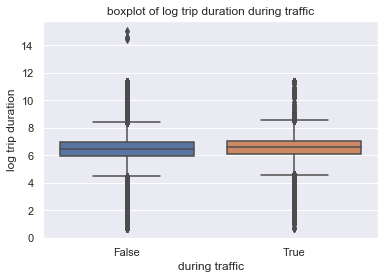

In [171]:
temp = data_train[['log_trip_duration', 'during_traffic', 'during_free_roads', 'LaGuardia_pickup', 'LaGuardia_dropoff', 'JFK_pickup', 'JFK_dropoff']]
#temp
sns.boxplot(x="during_traffic", y="log_trip_duration", data=temp)
plt.title('boxplot of log trip duration during traffic')
plt.xlabel('during traffic')
plt.ylabel('log trip duration')
plt.show()

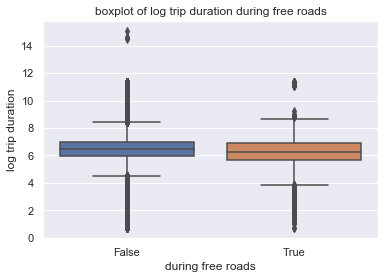

In [172]:
sns.boxplot(x="during_free_roads", y="log_trip_duration", data=temp)
plt.title('boxplot of log trip duration during free roads')
plt.xlabel('during free roads')
plt.ylabel('log trip duration')
plt.show()

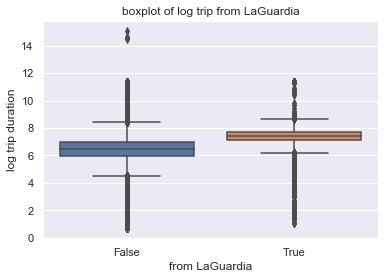

In [173]:
sns.boxplot(x="LaGuardia_pickup", y="log_trip_duration", data=temp)
plt.title('boxplot of log trip from LaGuardia')
plt.xlabel('from LaGuardia')
plt.ylabel('log trip duration')
plt.show()

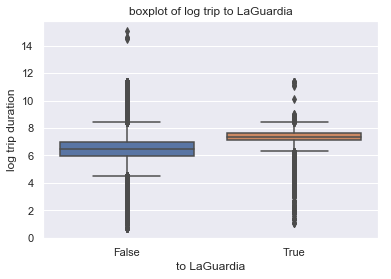

In [174]:
sns.boxplot(x="LaGuardia_dropoff", y="log_trip_duration", data=temp)
plt.title('boxplot of log trip to LaGuardia')
plt.xlabel('to LaGuardia')
plt.ylabel('log trip duration')
plt.show()

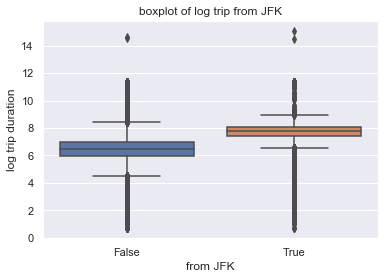

In [175]:
sns.boxplot(x="JFK_pickup", y="log_trip_duration", data=temp)
plt.title('boxplot of log trip from JFK')
plt.xlabel('from JFK')
plt.ylabel('log trip duration')
plt.show()

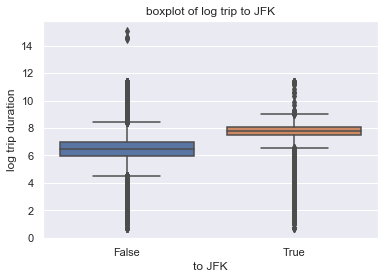

In [176]:
sns.boxplot(x="JFK_dropoff", y="log_trip_duration", data=temp)
plt.title('boxplot of log trip to JFK')
plt.xlabel('to JFK')
plt.ylabel('log trip duration')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [177]:
from sklearn.base import BaseEstimator, TransformerMixin

a = (40.797710, -74.018708)
b = (40.797710, -73.937114)
c = (40.707075, -73.937114)
d = (40.707075, -74.018708)
# a, b, c, d - координаты углов прямоугольника с картинки (взято "на глазок")
x = 3
y = 4
stepy = (a[0] - c[0])/y
stepx = (b[1] - a[1])/x
#print(stepx, stepy)
Zones = []
for i in range(y):
     Zones.append([(0,0,0,0)] * x)
        
#for i in range(y):
#    for j in range(x):
#        print(Zones[i][j], end=' ')
#    print(end='\n')
    
yi = d[1]
xi = d[0]
#print(d[0], d[1], stepx, stepy, b[0], b[1])
#print((d[0] - b[0])/stepy)
#print((d[1] - b[1])/stepx)

for i in range(y-1,-1,-1):
    for j in range(x):
        #print(i, j, xi, yi)
        Zones[i][j] = (xi, yi, xi + stepy, yi + stepx)
       # print(Zones[i][j], end = ' ')
        yi += stepx
        
    #print()
    xi += stepy
    yi = d[1]
#print()
#for i in range(y):
#    for j in range(x):
#        print(Zones[i][j], end = ' ')
#    print()

data_train['cell_pickup'] = data_train.apply(lambda x: -1, axis=1)
data_train['cell_dropoff'] = data_train.apply(lambda x: -1, axis=1)

#print(data_train)

count = 0
for i in range(y):
    for j in range(x):
        data_train['cell_pickup'] = data_train.apply(lambda x: count if (x['pickup_longitude'] > Zones[i][j][1] and x['pickup_longitude'] < Zones[i][j][3] and x['pickup_latitude'] > Zones[i][j][0] and x['pickup_latitude'] < Zones[i][j][2]) else x['cell_pickup'], axis=1)
        data_train['cell_dropoff'] = data_train.apply(lambda x: count if (x['dropoff_longitude'] > Zones[i][j][1] and x['dropoff_longitude'] < Zones[i][j][3] and x['dropoff_latitude'] > Zones[i][j][0] and x['dropoff_latitude'] < Zones[i][j][2]) else x['cell_dropoff'], axis=1)
                                                    
        #if (data_train.loc[i, 'pickup_longitude'] > Zones[i][j][1] and data_train.loc[i, 'pickup_longitude'] < Zones[i][j][3] and data_train.loc[i, 'pickup_latitude'] > Zones[i][j][0] and data_train.loc[i, 'pickup_latitude'] < Zones[i][j][2]):
        #    data_train.loc[i, 'cell_pickup'] = count
        #if (data_train.loc[i, 'dropoff_longitude'] > Zones[i][j][1] and data_train.loc[i, 'dropoff_longitude'] < Zones[i][j][3] and data_train.loc[i, 'dropoff_latitude'] > Zones[i][j][0] and data_train.loc[i, 'dropoff_latitude'] < Zones[i][j][2]):
        #    data_train.loc[i, 'cell_dropoff'] = count
        count += 1
        if (count == 12):
            count = 0
                                                      
                                        
data_train

#class MapGridTransformer(BaseEstimator, TransformerMixin):
    

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,during_traffic,during_free_roads,LaGuardia_pickup,LaGuardia_dropoff,JFK_pickup,JFK_dropoff,cell_pickup,cell_dropoff
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,...,1.411815,0.880380,False,False,False,False,False,False,6,10
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,...,1.904250,1.066175,False,False,False,False,False,False,7,1
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,...,12.302947,2.587986,False,False,False,True,False,False,7,-1
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,...,0.941963,0.663699,True,False,False,False,False,False,1,4
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,...,0.765366,0.568358,True,False,False,False,False,False,4,4
121772,id0111855,2,2016-05-09 14:42:03,6,-73.789993,40.643967,-73.987846,40.748131,N,3655,...,22.233830,3.145609,False,False,False,False,True,False,-1,7
40567,id2525305,1,2016-04-09 17:56:39,1,-74.009048,40.705406,-73.994514,40.750690,N,1396,...,2.130204,1.141098,False,False,False,False,False,False,-1,6
650192,id0042030,1,2016-03-29 10:33:54,2,-73.982208,40.757610,-73.972107,40.749966,N,1332,...,1.147461,0.764286,True,False,False,False,False,False,4,7
119771,id3267762,2,2016-05-14 13:49:53,6,-73.985046,40.722771,-73.962639,40.712429,N,585,...,2.511751,1.256115,False,False,False,False,False,False,10,11
494697,id1783695,2,2016-02-01 22:09:17,3,-73.978363,40.754337,-73.973701,40.787216,N,671,...,1.134525,0.758244,False,False,False,False,False,False,4,1


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [178]:
#для начала добавим все новые параметры в тестовую выборку

data_test['haversine'] = data_test.apply(lambda x: haversine((x['pickup_longitude'], x['pickup_latitude']), (x['dropoff_longitude'], x['dropoff_latitude'])) , axis=1)
data_test['log_haversine'] = np.log1p(data_test['haversine'])
data_test['during_traffic'] = data_test.apply(lambda x: ((x['weekday'] < 6 and (x['hour'] > 7 and x['hour'] < 13)) or ((x['weekday'] > 0 and x['weekday'] < 4) and (x['hour'] > 12 and x['hour'] < 16)) or (x['weekday'] == 5 and x['hour'] == 19)), axis=1)
data_test['during_free_roads'] = data_test.apply(lambda x: ((x['weekday'] < 4 and (x['hour'] < 6 and x['hour'] > 3)) or (x['weekday'] == 4 and x['hour'] == 5) or (x['weekday'] == 5 and (x['hour'] > 4 and x['hour'] < 7)) or (x['weekday'] == 6 and (x['hour'] < 8 and x['hour'] > 4))), axis = 1)
data_test['LaGuardia_pickup'] = data_test.apply(lambda x: (x['pickup_longitude'] > -73.886067 and x['pickup_latitude'] > 40.767833 and x['pickup_longitude'] < -73.855189 and x['pickup_latitude'] < 40.785524), axis=1)
data_test['LaGuardia_dropoff'] = data_test.apply(lambda x: (x['dropoff_longitude'] > -73.886067 and x['dropoff_latitude'] > 40.767833 and x['dropoff_longitude'] < -73.855189 and x['dropoff_latitude'] < 40.785524), axis=1)
data_test['JFK_pickup'] = data_test.apply(lambda x: (x['pickup_longitude'] > -73.823325 and x['pickup_latitude'] > 40.622359 and x['pickup_longitude'] < -73.753042 and x['pickup_latitude'] < 40.658041), axis=1)
data_test['JFK_dropoff'] = data_test.apply(lambda x: (x['dropoff_longitude'] > -73.823325 and x['dropoff_latitude'] > 40.622359 and x['dropoff_longitude'] < -73.753042 and x['dropoff_latitude'] < 40.658041), axis=1)

a = (40.797710, -74.018708)
b = (40.797710, -73.937114)
c = (40.707075, -73.937114)
d = (40.707075, -74.018708)
# a, b, c, d - координаты углов прямоугольника с картинки (взято "на глазок")
x = 3
y = 4
stepy = (a[0] - c[0])/y
stepx = (b[1] - a[1])/x
#print(stepx, stepy)
Zones = []
for i in range(y):
     Zones.append([(0,0,0,0)] * x)
        
#for i in range(y):
#    for j in range(x):
#        print(Zones[i][j], end=' ')
#    print(end='\n')
    
yi = d[1]
xi = d[0]
#print(d[0], d[1], stepx, stepy, b[0], b[1])
#print((d[0] - b[0])/stepy)
#print((d[1] - b[1])/stepx)

for i in range(y-1,-1,-1):
    for j in range(x):
        #print(i, j, xi, yi)
        Zones[i][j] = (xi, yi, xi + stepy, yi + stepx)
       # print(Zones[i][j], end = ' ')
        yi += stepx
        
    #print()
    xi += stepy
    yi = d[1]
#print()
#for i in range(y):
#    for j in range(x):
#        print(Zones[i][j], end = ' ')
#    print()

data_test['cell_pickup'] = data_test.apply(lambda x: -1, axis=1)
data_test['cell_dropoff'] = data_test.apply(lambda x: -1, axis=1)

#print(data_train)

count = 0
for i in range(y):
    for j in range(x):
        data_test['cell_pickup'] = data_test.apply(lambda x: count if (x['pickup_longitude'] > Zones[i][j][1] and x['pickup_longitude'] < Zones[i][j][3] and x['pickup_latitude'] > Zones[i][j][0] and x['pickup_latitude'] < Zones[i][j][2]) else x['cell_pickup'], axis=1)
        data_test['cell_dropoff'] = data_test.apply(lambda x: count if (x['dropoff_longitude'] > Zones[i][j][1] and x['dropoff_longitude'] < Zones[i][j][3] and x['dropoff_latitude'] > Zones[i][j][0] and x['dropoff_latitude'] < Zones[i][j][2]) else x['cell_dropoff'], axis=1)

        count += 1
        if (count == 12):
            count = 0


data_test



,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,during_traffic,during_free_roads,LaGuardia_pickup,LaGuardia_dropoff,JFK_pickup,JFK_dropoff,cell_pickup,cell_dropoff
112342,id2631171,2,2016-01-23 00:09:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,...,1.643249,0.972009,False,False,False,False,False,False,6,9
840803,id2892416,1,2016-02-10 19:24:14,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,...,4.636869,1.729329,False,False,False,False,False,False,2,6
184538,id3095142,2,2016-05-12 06:39:26,1,-73.987595,40.719822,-74.010994,40.716148,N,490,...,2.604328,1.282135,False,False,False,False,False,False,10,9
512001,id3803823,2,2016-01-21 08:31:03,1,-73.969055,40.763618,-73.974129,40.778679,N,767,...,0.729436,0.547795,True,False,False,False,False,False,4,1
776055,id3155730,2,2016-01-02 13:12:33,2,-73.950165,40.775635,-73.944534,40.779636,N,199,...,0.638059,0.493512,False,False,False,False,False,False,2,2
910791,id0874356,1,2016-06-15 12:01:16,2,-73.980469,40.760086,-73.979256,40.757919,N,1087,...,0.150386,0.140097,True,False,False,False,False,False,4,4
1364150,id0458768,2,2016-04-24 21:40:52,2,-73.862770,40.768749,-73.980339,40.673988,N,1594,...,13.394839,2.666870,False,False,True,False,False,False,-1,-1
927588,id0341390,2,2016-02-06 02:39:32,5,-74.000008,40.727139,-73.991692,40.731590,N,292,...,0.934720,0.659963,False,False,False,False,False,False,9,6
1075265,id3060373,2,2016-04-30 22:18:43,1,-73.985252,40.748241,-73.958794,40.638069,N,2162,...,4.482966,1.701646,False,False,False,False,False,False,7,-1
245702,id3697455,2,2016-05-06 13:26:07,2,-73.980804,40.764107,-73.987968,40.754925,N,695,...,0.844940,0.612447,False,False,False,False,False,False,4,4


In [179]:
#temp = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day', 'trip_duration']]
#temp

y_test = data_test['log_trip_duration']
y_train = data_train['log_trip_duration']
X_test = data_test[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day', 'log_haversine', 'during_traffic', 'during_free_roads', 'LaGuardia_pickup', 'LaGuardia_dropoff', 'JFK_pickup', 'JFK_dropoff', 'cell_pickup', 'cell_dropoff']]
X_train = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day',  'log_haversine', 'during_traffic', 'during_free_roads', 'LaGuardia_pickup', 'LaGuardia_dropoff', 'JFK_pickup', 'JFK_dropoff', 'cell_pickup', 'cell_dropoff']]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

#model = pipeline.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("Test RMSE = %.4f" % rmse(y_test, y_pred))

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns


#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

#print("Test RMSE = %.4f" % rmse(y_test, y_pred))
#print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 0.3339
Train MSE = 0.3354


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [180]:
print(len(pd.unique(data_train['vendor_id'])), len(pd.unique(data_train['passenger_count'])), len(pd.unique(data_train['store_and_fwd_flag'])))

2 9 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

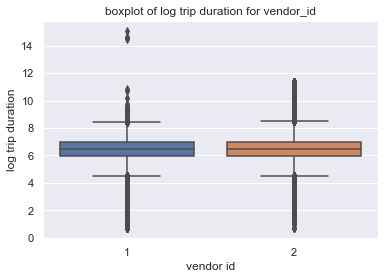

In [181]:
sns.boxplot(x="vendor_id", y="log_trip_duration", data=data_train)
plt.title('boxplot of log trip duration for vendor_id')
plt.xlabel('vendor id')
plt.ylabel('log trip duration')
plt.show()

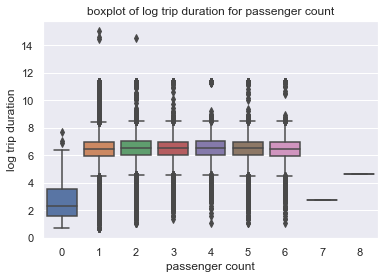

In [182]:
sns.boxplot(x="passenger_count", y="log_trip_duration", data=data_train)
plt.title('boxplot of log trip duration for passenger count')
plt.xlabel('passenger count')
plt.ylabel('log trip duration')
plt.show()

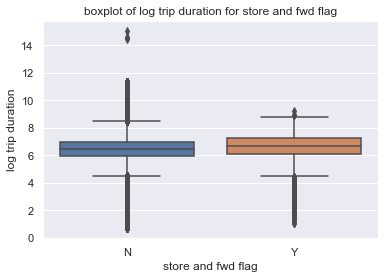

In [183]:
sns.boxplot(x="store_and_fwd_flag", y="log_trip_duration", data=data_train)
plt.title('boxplot of log trip duration for store and fwd flag')
plt.xlabel('store and fwd flag')
plt.ylabel('log trip duration')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [184]:
data_train['vendor_id'] = data_train.apply(lambda x: x['vendor_id'] - 1, axis=1)
data_train['store_and_fwd_flag'] = data_train.apply(lambda x: 0 if x['store_and_fwd_flag'] == "N" else 1, axis=1)
print(data_train['vendor_id'], data_train['store_and_fwd_flag'])

824746     1
645821     1
691846     1
1147931    1
183569     0
121772     1
40567      0
650192     0
119771     1
494697     1
1384568    0
1450642    0
160721     0
95923      0
1192924    0
40128      1
914416     1
550610     1
1189678    0
683626     0
4975       1
297230     1
1110463    1
310893     1
879335     1
1228970    0
154572     1
936128     1
1152945    0
1390214    1
          ..
1312086    1
1262221    0
344473     1
400115     0
274445     0
474565     0
946253     1
1261235    1
745316     1
324808     0
950846     0
519531     1
822616     0
575883     0
180463     1
840036     1
1152528    1
964979     1
1293732    0
710912     1
1188872    1
960506     0
1326961    1
1157021    0
804336     0
1348317    0
1154171    0
617841     0
1048548    0
1393929    0
Name: vendor_id, Length: 1021050, dtype: int64 824746     0
645821     0
691846     0
1147931    0
183569     0
121772     0
40567      0
650192     0
119771     0
494697     0
1384568    0
1450642    0
1607

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Нет, не думаю

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [185]:
data_test['vendor_id'] = data_test.apply(lambda x: x['vendor_id'] - 1, axis=1)
data_test['store_and_fwd_flag'] = data_test.apply(lambda x: 0 if x['store_and_fwd_flag'] == "N" else 1, axis=1)

In [186]:
y_test = data_test['log_trip_duration']
y_train = data_train['log_trip_duration']
X_test = data_test[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day', 'log_haversine', 'during_traffic', 'during_free_roads', 'LaGuardia_pickup', 'LaGuardia_dropoff', 'JFK_pickup', 'JFK_dropoff', 'cell_pickup', 'cell_dropoff', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
X_train = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day',  'log_haversine', 'during_traffic', 'during_free_roads', 'LaGuardia_pickup', 'LaGuardia_dropoff', 'JFK_pickup', 'JFK_dropoff', 'cell_pickup', 'cell_dropoff', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

#model = pipeline.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("Test RMSE = %.4f" % rmse(y_test, y_pred))

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns


#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

#print("Test RMSE = %.4f" % rmse(y_test, y_pred))
#print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 0.3337
Train MSE = 0.3352


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [187]:
del data_train ['vendor_id']
del data_train ['store_and_fwd_flag']
del data_train ['passenger_count']

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

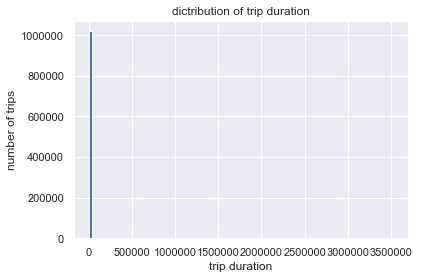

In [188]:
plt.hist(data_train['trip_duration'], bins=100)
plt.title('dictribution of trip duration')
plt.xlabel('trip duration')
plt.ylabel('number of trips')
plt.show()

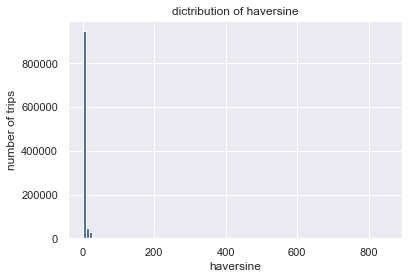

In [189]:
plt.hist(data_train['haversine'], bins=100)
plt.title('dictribution of haversine')
plt.xlabel('haversine')
plt.ylabel('number of trips')
plt.show()
plt.show()

In [190]:
mask = data_train['trip_duration'] > data_train['trip_duration'].quantile(.05)
# получается, что отметаются все поездки <  3 минут, что логично
data_train = data_train[mask]
data_train


,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day,num,...,haversine,log_haversine,during_traffic,during_free_roads,LaGuardia_pickup,LaGuardia_dropoff,JFK_pickup,JFK_dropoff,cell_pickup,cell_dropoff
824746,id2365163,2016-03-27 00:25:29,-73.996986,40.742210,-73.987740,40.710659,1254,7.134891,87,1,...,1.411815,0.880380,False,False,False,False,False,False,6,10
645821,id3126187,2016-03-18 20:44:12,-73.989929,40.741760,-73.977280,40.783600,970,6.878326,78,1,...,1.904250,1.066175,False,False,False,False,False,False,7,1
691846,id2588127,2016-04-15 18:26:12,-73.972366,40.750725,-73.861832,40.768387,2084,7.642524,106,1,...,12.302947,2.587986,False,False,False,True,False,False,7,-1
1147931,id0915715,2016-03-24 14:28:34,-73.982361,40.776901,-73.975128,40.760921,980,6.888572,84,1,...,0.941963,0.663699,True,False,False,False,False,False,1,4
183569,id3758776,2016-04-28 13:53:52,-73.973778,40.764374,-73.966957,40.761024,481,6.177944,119,1,...,0.765366,0.568358,True,False,False,False,False,False,4,4
121772,id0111855,2016-05-09 14:42:03,-73.789993,40.643967,-73.987846,40.748131,3655,8.204125,130,1,...,22.233830,3.145609,False,False,False,False,True,False,-1,7
40567,id2525305,2016-04-09 17:56:39,-74.009048,40.705406,-73.994514,40.750690,1396,7.242082,100,1,...,2.130204,1.141098,False,False,False,False,False,False,-1,6
650192,id0042030,2016-03-29 10:33:54,-73.982208,40.757610,-73.972107,40.749966,1332,7.195187,89,1,...,1.147461,0.764286,True,False,False,False,False,False,4,7
119771,id3267762,2016-05-14 13:49:53,-73.985046,40.722771,-73.962639,40.712429,585,6.373320,135,1,...,2.511751,1.256115,False,False,False,False,False,False,10,11
494697,id1783695,2016-02-01 22:09:17,-73.978363,40.754337,-73.973701,40.787216,671,6.510258,32,1,...,1.134525,0.758244,False,False,False,False,False,False,4,1


In [191]:
mask = data_train['haversine'] < data_train['haversine'].quantile(.999988)
# убираем все, где расстояние > 100 (таких довольно мало)
data_train = data_train[mask]
data_train['log_haversine'] = np.log1p(data_train['haversine'])
data_train

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day,num,...,haversine,log_haversine,during_traffic,during_free_roads,LaGuardia_pickup,LaGuardia_dropoff,JFK_pickup,JFK_dropoff,cell_pickup,cell_dropoff
824746,id2365163,2016-03-27 00:25:29,-73.996986,40.742210,-73.987740,40.710659,1254,7.134891,87,1,...,1.411815,0.880380,False,False,False,False,False,False,6,10
645821,id3126187,2016-03-18 20:44:12,-73.989929,40.741760,-73.977280,40.783600,970,6.878326,78,1,...,1.904250,1.066175,False,False,False,False,False,False,7,1
691846,id2588127,2016-04-15 18:26:12,-73.972366,40.750725,-73.861832,40.768387,2084,7.642524,106,1,...,12.302947,2.587986,False,False,False,True,False,False,7,-1
1147931,id0915715,2016-03-24 14:28:34,-73.982361,40.776901,-73.975128,40.760921,980,6.888572,84,1,...,0.941963,0.663699,True,False,False,False,False,False,1,4
183569,id3758776,2016-04-28 13:53:52,-73.973778,40.764374,-73.966957,40.761024,481,6.177944,119,1,...,0.765366,0.568358,True,False,False,False,False,False,4,4
121772,id0111855,2016-05-09 14:42:03,-73.789993,40.643967,-73.987846,40.748131,3655,8.204125,130,1,...,22.233830,3.145609,False,False,False,False,True,False,-1,7
40567,id2525305,2016-04-09 17:56:39,-74.009048,40.705406,-73.994514,40.750690,1396,7.242082,100,1,...,2.130204,1.141098,False,False,False,False,False,False,-1,6
650192,id0042030,2016-03-29 10:33:54,-73.982208,40.757610,-73.972107,40.749966,1332,7.195187,89,1,...,1.147461,0.764286,True,False,False,False,False,False,4,7
119771,id3267762,2016-05-14 13:49:53,-73.985046,40.722771,-73.962639,40.712429,585,6.373320,135,1,...,2.511751,1.256115,False,False,False,False,False,False,10,11
494697,id1783695,2016-02-01 22:09:17,-73.978363,40.754337,-73.973701,40.787216,671,6.510258,32,1,...,1.134525,0.758244,False,False,False,False,False,False,4,1


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

Я решил, что довольно логично объединить все поездки в аэропорта в одну категорию. Они вчетвером все довольно редкие и обладают похожим смыслм, поэтому я считаю, что это подходит под задание

In [192]:
data_train['Airport'] = data_train.apply(lambda x: (x['LaGuardia_pickup'] or x['LaGuardia_dropoff'] or x['JFK_pickup'] or x['JFK_dropoff']), axis=1)
del data_train ['LaGuardia_pickup']
del data_train ['LaGuardia_dropoff']
del data_train ['JFK_pickup']
del data_train ['JFK_dropoff']
data_train

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day,num,...,month,anomaly_january,anomaly_may,haversine,log_haversine,during_traffic,during_free_roads,cell_pickup,cell_dropoff,Airport
824746,id2365163,2016-03-27 00:25:29,-73.996986,40.742210,-73.987740,40.710659,1254,7.134891,87,1,...,3,False,False,1.411815,0.880380,False,False,6,10,False
645821,id3126187,2016-03-18 20:44:12,-73.989929,40.741760,-73.977280,40.783600,970,6.878326,78,1,...,3,False,False,1.904250,1.066175,False,False,7,1,False
691846,id2588127,2016-04-15 18:26:12,-73.972366,40.750725,-73.861832,40.768387,2084,7.642524,106,1,...,4,False,False,12.302947,2.587986,False,False,7,-1,True
1147931,id0915715,2016-03-24 14:28:34,-73.982361,40.776901,-73.975128,40.760921,980,6.888572,84,1,...,3,False,False,0.941963,0.663699,True,False,1,4,False
183569,id3758776,2016-04-28 13:53:52,-73.973778,40.764374,-73.966957,40.761024,481,6.177944,119,1,...,4,False,False,0.765366,0.568358,True,False,4,4,False
121772,id0111855,2016-05-09 14:42:03,-73.789993,40.643967,-73.987846,40.748131,3655,8.204125,130,1,...,5,False,False,22.233830,3.145609,False,False,-1,7,True
40567,id2525305,2016-04-09 17:56:39,-74.009048,40.705406,-73.994514,40.750690,1396,7.242082,100,1,...,4,False,False,2.130204,1.141098,False,False,-1,6,False
650192,id0042030,2016-03-29 10:33:54,-73.982208,40.757610,-73.972107,40.749966,1332,7.195187,89,1,...,3,False,False,1.147461,0.764286,True,False,4,7,False
119771,id3267762,2016-05-14 13:49:53,-73.985046,40.722771,-73.962639,40.712429,585,6.373320,135,1,...,5,False,False,2.511751,1.256115,False,False,10,11,False
494697,id1783695,2016-02-01 22:09:17,-73.978363,40.754337,-73.973701,40.787216,671,6.510258,32,1,...,2,False,False,1.134525,0.758244,False,False,4,1,False


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [193]:


data_test['Airport'] = data_test.apply(lambda x: (x['LaGuardia_pickup'] or x['LaGuardia_dropoff'] or x['JFK_pickup'] or x['JFK_dropoff']), axis=1)


y_test = data_test['log_trip_duration']
y_train = data_train['log_trip_duration']
X_test = data_test[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day', 'log_haversine', 'during_traffic', 'during_free_roads', 'Airport', 'cell_pickup', 'cell_dropoff']]
X_train = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day',  'log_haversine', 'during_traffic', 'during_free_roads', 'Airport', 'cell_pickup', 'cell_dropoff']]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

#model = pipeline.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("Test RMSE = %.4f" % rmse(y_test, y_pred))

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns


#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

#print("Test RMSE = %.4f" % rmse(y_test, y_pred))
#print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))


Test MSE = 0.3450
Train MSE = 0.2481


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [194]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, y_pred))

MSE = 0.6397


Можно видеть, что лучше не стало:)

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

In [57]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [195]:
data_train['cell_pairs'] = data_train.apply(lambda x: int(str(x['cell_pickup']) + str(x['cell_dropoff'])) if (x['cell_pickup'] != -1 and x['cell_dropoff'] != -1) else -1, axis=1)
temp = data_train[['cell_pairs', 'num']]
temp = temp.groupby('cell_pairs').sum().reset_index()
temp = temp.sort_values(by=['num'])
a = temp

temp

,cell_pairs,num
88,100,1
1,0,2
78,90,2
59,70,3
20,30,5
49,60,7
30,40,7
101,113,21
71,83,24
69,81,27


Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [196]:
data_test['cell_pairs'] = data_test.apply(lambda x: int(str(x['cell_pickup']) + str(x['cell_dropoff'])) if (x['cell_pickup'] != -1 and x['cell_dropoff'] != -1) else -1, axis=1)

y_test = data_test['log_trip_duration']
y_train = data_train['log_trip_duration']
X_test = data_test[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day', 'log_haversine', 'during_traffic', 'during_free_roads', 'Airport', 'cell_pickup', 'cell_dropoff', 'cell_pairs']]
X_train = data_train[['weekday', 'month', 'hour', 'anomaly_january', 'anomaly_may', 'day',  'log_haversine', 'during_traffic', 'during_free_roads', 'Airport', 'cell_pickup', 'cell_dropoff', 'cell_pairs']]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

#model = pipeline.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("Test RMSE = %.4f" % rmse(y_test, y_pred))

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns


#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

#print("Test RMSE = %.4f" % rmse(y_test, y_pred))
#print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))



Test MSE = 0.3445
Train MSE = 0.2479


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [61]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [62]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ